# Analýza dat pro mapu hypsometrie

In [37]:
# -*- coding: utf-8 -*-
from __future__ import unicode_literals

In [38]:
# NASTAVENÍ PROMĚNNÝCH:

# maximalni mozny pocet linii v 1/16 uzemi
max_pocet_dilci = 20

# minimalni mozny pocet linii v 1/16 uzemi
min_pocet_dilci = 1

# idealni pocet pocet linii v 1/16 uzemi
ideal_pocet_dilci = 8

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# nacti vsechny csv soubory (vystupy funkce 1_hypsometrie.py)
ziv5 = pd.read_csv(r"C:\fenclova\diplomka\analyza\vysledky\1_hypsometrieZIV5_1991.csv").set_index("ID")
ziv10 = pd.read_csv(r"C:\fenclova\diplomka\analyza\vysledky\1_hypsometrieZIV10_1991.csv").set_index("ID")
ziv20 = pd.read_csv(r"C:\fenclova\diplomka\analyza\vysledky\1_hypsometrieZIV20_1991.csv").set_index("ID")

ziv5.head()


,ziv5_celkem,ziv5_1,ziv5_2,ziv5_3,ziv5_4,ziv5_5,ziv5_6,ziv5_7,ziv5_8,ziv5_9,ziv5_10,ziv5_11,ziv5_12,ziv5_13,ziv5_14,ziv5_15,ziv5_16
ID,,,,,,,,,,,,,,,,,
46,20,1,1,2,2,1,2,6,7,6,7,6,4,5,5,6,7
58,31,6,3,10,5,5,5,11,10,2,6,11,12,4,3,14,15
92,70,18,22,18,11,16,21,18,10,12,12,9,17,12,14,8,17
96,26,5,11,10,8,13,16,17,14,14,5,3,4,6,5,6,5
104,26,3,7,8,7,6,9,3,3,6,6,4,4,8,8,3,3


In [87]:
ziv5.describe()

,ziv5_celkem,ziv5_1,ziv5_2,ziv5_3,ziv5_4,ziv5_5,ziv5_6,ziv5_7,ziv5_8,ziv5_9,ziv5_10,ziv5_11,ziv5_12,ziv5_13,ziv5_14,ziv5_15,ziv5_16
count,1965.000000,1965.000000,1965.000000,1965.000000,1965.000000,1965.000000,1965.000000,1965.000000,1965.000000,1965.000000,1965.000000,1965.000000,1965.000000,1965.000000,1965.000000,1965.000000,1965.000000
mean,46.215267,10.026463,10.538422,10.587277,10.377608,10.679898,11.184733,11.123155,10.684987,10.862595,11.339949,11.128753,10.600000,10.626972,10.917048,10.515013,10.021883
std,31.163323,8.924229,9.643502,9.631401,9.372844,9.666950,10.292760,10.235371,9.780483,10.105173,10.684537,10.272123,9.505267,9.553195,10.438489,9.806706,9.026834
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
50%,40.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,7.000000
75%,62.000000,14.000000,14.000000,14.000000,14.000000,15.000000,15.000000,15.000000,14.000000,15.000000,15.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,196.000000,62.000000,71.000000,66.000000,83.000000,71.000000,90.000000,76.000000,98.000000,112.000000,90.000000,86.000000,74.000000,97.000000,90.000000,87.000000,61.000000


In [41]:
# TODO: chci získat pole indexů
index = ziv5.index
index

Int64Index([   46,    58,    92,    96,   104,   126,   177,   181,   196,
              213,
            ...
            30756, 10342, 13890, 19393, 26084, 10382, 16116, 18840, 23790,
            25203],
           dtype='int64', name=u'ID', length=1965)

## vyřazení nevhodných variant
##### příliš málo, příliš mnoho v dílčím čtverci > filruji území, kde je rozdílná členitost v území

In [42]:
# funkce vrátí True, když záznam splňuje podmínky (min a max pocet vrstevnic)
def libinelibi(radek):
    return all(map(lambda x: min_pocet_dilci <= x <= max_pocet_dilci, list(radek)[2:]))

# filtruji data podle fuknce libinelibi
filtered_ziv5 = ziv5[ziv5.apply(libinelibi, axis=1)]
filtered_ziv10 = ziv10[ziv10.apply(libinelibi, axis=1)]
filtered_ziv20 = ziv20[ziv20.apply(libinelibi, axis=1)]

In [43]:
filtered_ziv5.head()

,ziv5_celkem,ziv5_1,ziv5_2,ziv5_3,ziv5_4,ziv5_5,ziv5_6,ziv5_7,ziv5_8,ziv5_9,ziv5_10,ziv5_11,ziv5_12,ziv5_13,ziv5_14,ziv5_15,ziv5_16
ID,,,,,,,,,,,,,,,,,
46,20,1,1,2,2,1,2,6,7,6,7,6,4,5,5,6,7
58,31,6,3,10,5,5,5,11,10,2,6,11,12,4,3,14,15
96,26,5,11,10,8,13,16,17,14,14,5,3,4,6,5,6,5
104,26,3,7,8,7,6,9,3,3,6,6,4,4,8,8,3,3
177,31,10,10,5,7,6,6,5,7,5,5,6,5,3,3,7,6


In [44]:
# funkce sečte počet linií v 16 dílčích čtvercích
def soucet_dilcich_linii(radek):
    # odchylka return sum(map(lambda x: abs(x - ideal_pocet_dilci), list(radek)[2:]))
    return sum(map(lambda x: x, list(radek)[1:]))

# pro všech 16 dílků spočti součet linii v každém čtverečku
metrika_ziv5 = filtered_ziv5.apply(soucet_dilcich_linii, axis=1)
metrika_ziv10 = filtered_ziv10.apply(soucet_dilcich_linii, axis=1)
metrika_ziv20 = filtered_ziv20.apply(soucet_dilcich_linii, axis=1)

In [45]:
metrika_ziv5.head()

ID
46      68
58     122
96     142
104     88
177     96
dtype: int64

In [46]:
# z vyfiltrovaných hodnot vytvoř dataframy
a5 = metrika_ziv5.to_frame()
a5.columns = ['ziv5_sum16']

a10 = metrika_ziv10.to_frame()
a10.columns = ['ziv10_sum16']

a20 = metrika_ziv20.to_frame()
a20.columns = ['ziv20_sum16']

In [47]:
a5.head()

,ziv5_sum16
ID,
46,68
58,122
96,142
104,88
177,96


In [48]:
# pocet ZIV
ziv5_pocet = ziv5.ziv5_celkem.to_frame().sort_index()
ziv10_pocet = ziv10.ziv10_celkem.to_frame().sort_index()
ziv20_pocet = ziv20.ziv20_celkem.to_frame().sort_index()

In [49]:
ziv20_pocet.tail()

,ziv20_celkem
ID,
34292,11
34321,36
34361,23
34372,34
34415,21


In [50]:
# spoj pocet ZIV
ziv_pocet = ziv5_pocet.join(ziv10_pocet).join(ziv20_pocet)
ziv_pocet.head()

,ziv5_celkem,ziv10_celkem,ziv20_celkem
ID,,,
46,20,11.0,6
58,31,15.0,8
92,70,37.0,15
96,26,13.0,5
104,26,13.0,7


In [51]:
# spoj tabulky celkového počtu linií u ZIV a vyfiltrovanými a sečtenými daty
ziv_sum_pocet = ziv_pocet.join(a5).join(a10).join(a20)
ziv_sum_pocet.tail()

,ziv5_celkem,ziv10_celkem,ziv20_celkem,ziv5_sum16,ziv10_sum16,ziv20_sum16
ID,,,,,,
34292,46,23.0,11,156.0,77.0,39.0
34321,139,70.0,36,NaN,NaN,146.0
34361,94,47.0,23,NaN,NaN,90.0
34372,135,68.0,34,NaN,NaN,166.0
34415,88,44.0,21,NaN,156.0,76.0


In [52]:
# hodnoty NaN nahraď číslem 99999
fill_ziv_sum_pocet = ziv_sum_pocet.fillna(99999)
fill_ziv_sum_pocet.head()

,ziv5_celkem,ziv10_celkem,ziv20_celkem,ziv5_sum16,ziv10_sum16,ziv20_sum16
ID,,,,,,
46,20,11.0,6,68.0,99999.0,99999.0
58,31,15.0,8,122.0,59.0,34.0
92,70,37.0,15,99999.0,117.0,56.0
96,26,13.0,5,142.0,70.0,31.0
104,26,13.0,7,88.0,44.0,99999.0


In [53]:
# ideální součet linií v 16 dílčích čtvercích
ideal_sum = ideal_pocet_dilci*16
ideal_sum

128

In [54]:
# vyber ZIV, který je blíže k ideálnímu počtu linií (zivX_sum16 closer to ideal_sum)

def vhodny_ziv(radek):
    odchylka5 = abs(radek['ziv5_sum16'] - ideal_sum)
    odchylka10 = abs(radek['ziv10_sum16'] - ideal_sum)
    odchylka20 = abs(radek['ziv20_sum16'] - ideal_sum)
    array = [odchylka5, odchylka10, odchylka20]
    
    # z pole odchylek vyber minimální a urči pozici
    idx = array.index(min(array))
    
    # podle pozice minimální odchylky urči ZIV    
    if (odchylka5 == odchylka10 == odchylka20): ziv = 99999 # pokud ani jeden ZIV neslpnuje "libinelibi"
    elif idx == 0: ziv = 5
    elif idx == 1: ziv = 10
    elif idx == 2: ziv = 20
        
    return ziv

vhodny_ziv = fill_ziv_sum_pocet.apply(vhodny_ziv, axis=1).to_frame()
vhodny_ziv.columns = ['vhodny_ziv']
vhodny_ziv.head()


,vhodny_ziv
ID,
46,5
58,5
92,10
96,5
104,5


In [55]:
# četnost ZIV
vhodny_ziv.vhodny_ziv.value_counts()

5        831
10       652
99999    290
20       192
Name: vhodny_ziv, dtype: int64

In [56]:
# k datům přiřad sloupec vhodný ziv
df = fill_ziv_sum_pocet.join(vhodny_ziv) # prestalo fungovat kdyz ziv = NaN
df.head()

,ziv5_celkem,ziv10_celkem,ziv20_celkem,ziv5_sum16,ziv10_sum16,ziv20_sum16,vhodny_ziv
ID,,,,,,,
46,20,11.0,6,68.0,99999.0,99999.0,5
58,31,15.0,8,122.0,59.0,34.0,5
92,70,37.0,15,99999.0,117.0,56.0,10
96,26,13.0,5,142.0,70.0,31.0,5
104,26,13.0,7,88.0,44.0,99999.0,5


In [57]:
# pridej sloupec soucet podle vhodneho ziv = 5 OR 10 OR 20

def metrika_vhodny_soucet(radek):
    if radek.vhodny_ziv == 5: soucet = radek.ziv5_sum16
    elif radek.vhodny_ziv == 10: soucet = radek.ziv10_sum16
    elif radek.vhodny_ziv == 20: soucet = radek.ziv20_sum16
    else: soucet = 99999
    
    return soucet

vhodny_soucet = df.apply(metrika_vhodny_soucet, axis=1).to_frame()
vhodny_soucet.columns = ['sum16']
vhodny_soucet.head()

,sum16
ID,
46,68.0
58,122.0
92,117.0
96,142.0
104,88.0


In [58]:
# pridej sloupec nejvhodnejsi pocet podle vhodny ziv = 5 OR 10 OR 20

def metrika_vhodny_pocet(radek):
    if radek.vhodny_ziv == 5: pocet = radek.ziv5_celkem
    elif radek.vhodny_ziv == 10: pocet = radek.ziv10_celkem
    elif radek.vhodny_ziv == 20: pocet = radek.ziv20_celkem
    else: pocet = 99999
    
    return pocet

vhodny_pocet = df.apply(metrika_vhodny_pocet, axis=1).to_frame()
vhodny_pocet.columns = ['pocet_hypso_vrstevnic']
vhodny_pocet.head()

,pocet_hypso_vrstevnic
ID,
46,20.0
58,31.0
92,37.0
96,26.0
104,26.0


In [59]:
# závěrečné spojení toho, co chci
hypsometrie_analyza = df.join(vhodny_soucet).join(vhodny_pocet)
hypsometrie_analyza = hypsometrie_analyza.fillna(99999)
hypsometrie_analyza.head()

,ziv5_celkem,ziv10_celkem,ziv20_celkem,ziv5_sum16,ziv10_sum16,ziv20_sum16,vhodny_ziv,sum16,pocet_hypso_vrstevnic
ID,,,,,,,,,
46,20,11.0,6,68.0,99999.0,99999.0,5,68.0,20.0
58,31,15.0,8,122.0,59.0,34.0,5,122.0,31.0
92,70,37.0,15,99999.0,117.0,56.0,10,117.0,37.0
96,26,13.0,5,142.0,70.0,31.0,5,142.0,26.0
104,26,13.0,7,88.0,44.0,99999.0,5,88.0,26.0


In [60]:
# výběr sloupců k exportu
final = hypsometrie_analyza[['vhodny_ziv', 'sum16', 'pocet_hypso_vrstevnic']]
final.head()

,vhodny_ziv,sum16,pocet_hypso_vrstevnic
ID,,,
46,5,68.0,20.0
58,5,122.0,31.0
92,10,117.0,37.0
96,5,142.0,26.0
104,5,88.0,26.0


In [61]:
# počet variant, které projdou přes funkci libinelibi = splnují základní požadavky na čtverec (min a max linií)
final[(final.vhodny_ziv != 99999)].describe()

,vhodny_ziv,sum16,pocet_hypso_vrstevnic
count,1675.000000,1675.000000,1675.000000
mean,8.665672,108.152836,29.561194
std,4.700897,31.593037,9.164515
min,5.000000,23.000000,5.000000
25%,5.000000,86.000000,23.000000
50%,10.000000,106.000000,29.000000
75%,10.000000,132.000000,36.000000
max,20.000000,177.000000,67.000000


In [62]:
# ulozeni vysledku analýzy hypsometrie
final.to_csv(r"C:\fenclova\diplomka\analyza\vysledky\analyza_1_hypsometrie.csv")

Text(0.5,1,u'Rozlo\u017een\xed sou\u010dtu vrstevnic v d\xedl\u010d\xedch \u010dtverc\xedch')

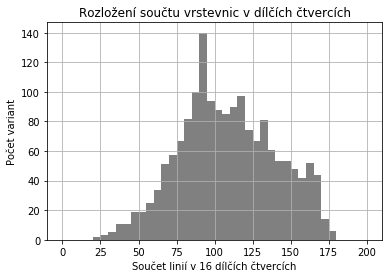

In [63]:
# histogram součtu v 16
d = final.sum16[final.sum16 != 99999]
plt.figure()

dx = d.hist(bins=200/5, range=[0, 200], facecolor='grey', align='mid'
           )
dx.set_xlabel('Součet linií v 16 dílčích čtvercích')
dx.set_ylabel('Počet variant')
dx.set_title("Rozložení součtu vrstevnic v dílčích čtvercích")

Text(0.5,1,u'Z\xe1vislost po\u010dtu vrstevnic na sou\u010dtu v d\xedl\u010d\xedch \u010dtverc\xedch')

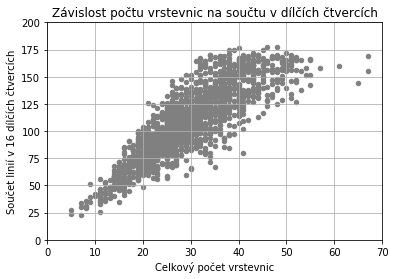

In [64]:
# graf závislosti součtu v 16 na celkovém počtu
a = final[final.sum16 != 99999]
ax = a.plot(x='pocet_hypso_vrstevnic', y='sum16', kind='scatter',
            color='grey',
            ylim={0, 200}, xlim={0,70}, grid=True)

ax.set_xlabel('Celkový počet vrstevnic')
ax.set_ylabel('Součet linií v 16 dílčích čtvercích')
ax.set_title("Závislost počtu vrstevnic na součtu v dílčích čtvercích")

In [65]:
# graf zavislosti celkového počtu vrstevnic a originálního počtu vrstevnic
# ??????

## Ohodnocení hypsometrie

In [66]:
ideal_sum

128

In [67]:
# přípustné varianty, točí se kolem ideální varianty
final[(final.sum16 >= ideal_sum-16*1) & (final.sum16 >= ideal_sum+16*1)].describe()

,vhodny_ziv,sum16,pocet_hypso_vrstevnic
count,559.000000,559.000000,559.000000
mean,51881.887299,51953.518784,51897.835420
std,50004.745777,49930.304421,49988.172131
min,5.000000,144.000000,26.000000
25%,5.000000,157.000000,41.000000
50%,99999.000000,99999.000000,99999.000000
75%,99999.000000,99999.000000,99999.000000
max,99999.000000,99999.000000,99999.000000


In [68]:
# ?????????? rozdělení do kategorií
# todo dodělat lépe řády
hypso_body = pd.cut(final['sum16'], 
               [0, 16*1, 16*3, 16*5, 16*7, 16*9, 16*11, 16*13, 16*15, 16*17, 16*20, float('inf')], 
       labels= [999, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0])

In [69]:
hypso_body = hypso_body.to_frame()

In [70]:
hypso_body.columns = ['hypso_body']
hypso_body.head()


,hypso_body
ID,
46,2
58,4
92,4
96,4
104,3


In [71]:
# ulozim dataframe jako novy csv soubor
#hypso_body.to_csv(r"C:\fenclova\diplomka\analyza\vysledky\analyza_1_hypsometrie_body.csv")

### testy: nalezení hodnot pro určitá místa

In [94]:
t = hypsometrie_analyza.sort_index()
t.loc[4225, :]

ziv5_celkem                132.0
ziv10_celkem                65.0
ziv20_celkem                33.0
ziv5_sum16               99999.0
ziv10_sum16              99999.0
ziv20_sum16                137.0
vhodny_ziv                  20.0
sum16                      137.0
pocet_hypso_vrstevnic       33.0
Name: 4225, dtype: float64

,ziv5_celkem,ziv10_celkem,ziv20_celkem,ziv5_sum16,ziv10_sum16,ziv20_sum16,vhodny_ziv,sum16,pocet_hypso_vrstevnic
ID,,,,,,,,,
